## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [50]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [51]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [52]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [53]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C,NaN,304,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,NaN,C,NaN,NaN,NaN


In [54]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [55]:
data['cabin']

0        B5
1       C22
2       C22
3       C22
4       C22
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: cabin, Length: 1309, dtype: object

In [56]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [57]:
data['title']

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
         ...  
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: title, Length: 1309, dtype: object

In [58]:
type(data)

pandas.core.frame.DataFrame

In [59]:
# cast numerical variables as floats
data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [60]:
data['fare']

0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64

In [61]:
data['age']

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [62]:
# Understanding the variables mentioned before dropping them
# We have taken these from dataframe named data and created a dataframe called data1
data1 = data[['name','ticket', 'boat', 'body','home.dest']]

In [63]:
data1

,name,ticket,boat,body,home.dest
0,"Allen, Miss. Elisabeth Walton",24160,2,NaN,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",113781,11,NaN,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",113781,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",113781,NaN,135,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",113781,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",2665,NaN,328,NaN
1305,"Zabour, Miss. Thamine",2665,NaN,NaN,NaN
1306,"Zakarian, Mr. Mapriededer",2656,NaN,304,NaN
1307,"Zakarian, Mr. Ortin",2670,NaN,NaN,NaN


In [64]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)
data

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [65]:
# save the data set
data.to_csv('titanic.csv', index=False)

In [66]:
data = pd.read_csv('titanic.csv')

## Data Exploration

### Find numerical and categorical variables

In [67]:
target = 'survived'

In [68]:
dataframe = data.columns

In [69]:
# Here 'O' means object
vars_num = [var for var in data.columns if data[var].dtypes!='O'] # fill your code here
type(vars_num)

list

In [70]:
vars_num

['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']

In [71]:
# We can see that survived has been categorised in numerical variables. However it is
# a categorical variable
vars_num.remove(target)

In [72]:
vars_num

['pclass', 'age', 'sibsp', 'parch', 'fare']

In [73]:
# to create a list of categorical columns 

#categorical_cols = []

# Iterate over the columns of the DataFrame
#for i in data.columns:
# If the data type of the column is object or category, it is categorical
#    if data[i].dtype == 'O' or data[i].dtype == 'category':
#        categorical_cols.append(i)
# print(categorical_cols)

# Reference: https://stackoverflow.com/questions/4260280/if-else-in-a-list-comprehension

In [74]:
vars_cat = [col for col in data.columns if data[col].dtype == 'O' or data[col].dtype.name == 'category'] # fill your code here
type(vars_cat)

list

In [75]:
vars_cat

['sex', 'cabin', 'embarked', 'title']

In [76]:
print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 5
Number of categorical variables: 4


In [77]:
vars_cat

['sex', 'cabin', 'embarked', 'title']

In [78]:
# Finding the columns having NaN values
data.isnull().sum()

pclass         0
survived       0
sex            0
age          263
sibsp          0
parch          0
fare           1
cabin       1014
embarked       2
title          0
dtype: int64

### Find missing values in variables

In [79]:
# first in numerical variables
# We are finding the missing values in numerical variables using for loop where the var
# is an iterator for traversing through the list vars_num and
# if the sum of the null values of the rows of these columns is greater than 0, 
# then we get the columns
numerical_missing = [var for var in vars_num if data[var].isnull().sum()>0]
numerical_missing

['age', 'fare']

In [80]:
# now in categorical variables
categorical_missing = [var for var in vars_cat if data[var].isnull().sum()>0]
categorical_missing

['cabin', 'embarked']

### Determine cardinality of categorical variables

In [81]:
data[vars_cat].nunique()

sex           2
cabin       181
embarked      3
title         5
dtype: int64

### Determine the distribution of numerical variables

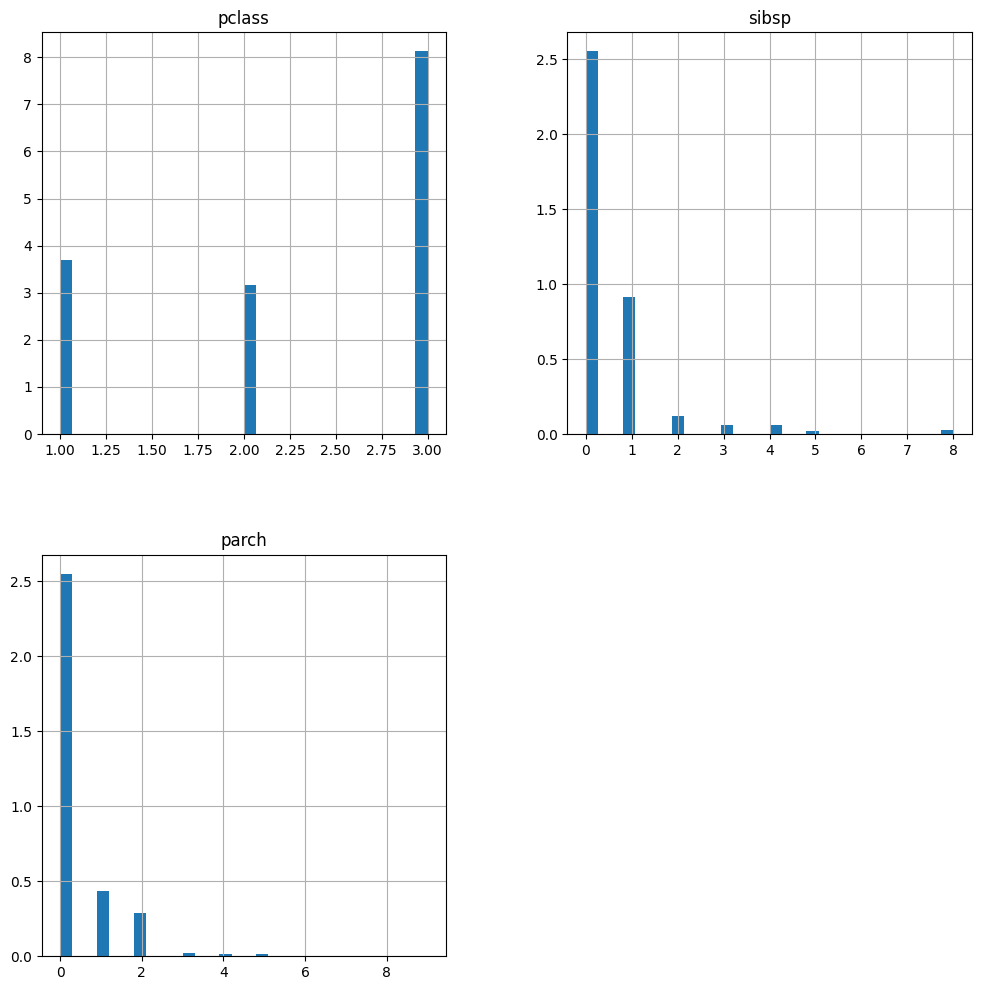

In [103]:
# distribution of int numerical variables
data[vars_num].select_dtypes(include=['int64']).hist(bins=30, figsize=(12,12), density=True)
plt.show()

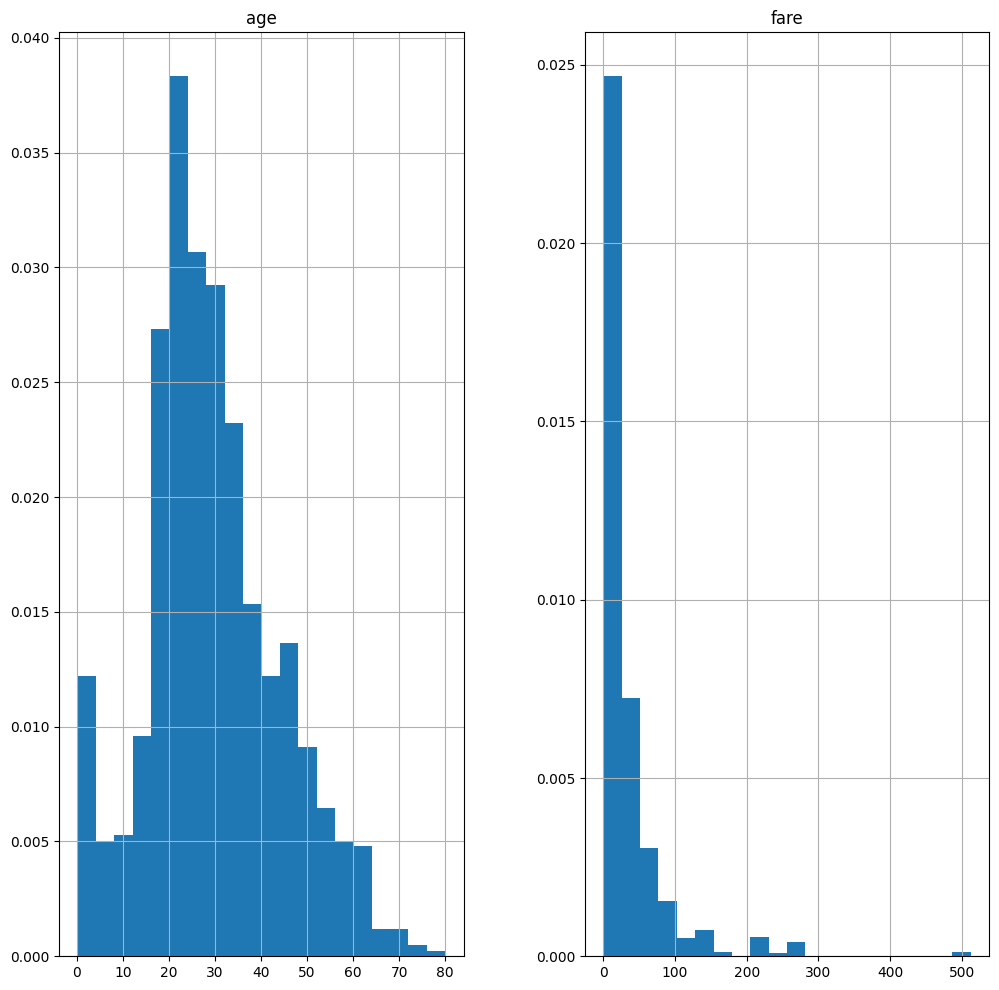

In [107]:
# distribution of float numerical variables
data[vars_num].select_dtypes(include=['float64']).hist(bins=20, figsize=(12,12), density=True)
plt.show()

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

In [84]:
X_train

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
1118,3,male,25.0000,0,0,7.9250,NaN,S,Mr
44,1,female,41.0000,0,0,134.5000,E40,C,Miss
1072,3,male,NaN,0,0,7.7333,NaN,Q,Mr
1130,3,female,18.0000,0,0,7.7750,NaN,S,Miss
574,2,male,29.0000,1,0,21.0000,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...
763,3,female,0.1667,1,2,20.5750,NaN,S,Miss
835,3,male,NaN,0,0,8.0500,NaN,S,Mr
1216,3,female,NaN,0,0,7.7333,NaN,Q,Miss
559,2,female,20.0000,0,0,36.7500,NaN,S,Miss


## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [85]:
X_train['cabin'] = X_train['cabin'].str[0]

print(X_train['cabin'].unique())

[nan 'E' 'F' 'A' 'C' 'D' 'B' 'T' 'G']


In [86]:
X_train['cabin'].value_counts()

C    78
B    52
E    36
D    36
A    19
F    18
G     4
T     1
Name: cabin, dtype: int64

In [90]:
X_test['cabin'] = X_test['cabin'].str[0]
print(X_test['cabin'].unique())

['n' 'G' 'E' 'C' 'B' 'A' 'F' 'D']


### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [92]:
for var in numerical_missing:
    
    # adding binary indicator to indicate missing values
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)
    
    # We are filling NA values with median
    median_val = X_train[var].median()
    X_train[var].fillna(median_val, inplace=True)
    X_test[var].fillna(median_val, inplace=True)
    
# check for missing values
print(X_train[['age', 'fare']].isnull().sum())

age     0
fare    0
dtype: int64


### Replace Missing data in categorical variables with the string **Missing**

In [93]:
X_train[numerical_missing] = X_train[numerical_missing].fillna('Missing')
X_test[numerical_missing] = X_test[numerical_missing].fillna('Missing')

In [94]:
X_train[numerical_missing]

,age,fare
1118,25.0000,7.9250
44,41.0000,134.5000
1072,28.0000,7.7333
1130,18.0000,7.7750
574,29.0000,21.0000
...,...,...
763,0.1667,20.5750
835,28.0000,8.0500
1216,28.0000,7.7333
559,20.0000,36.7500


In [95]:
X_test[numerical_missing]

,age,fare
1139,38.0,7.8958
533,21.0,21.0000
459,42.0,27.0000
1150,28.0,14.5000
393,25.0,31.5000
...,...,...
753,22.0,8.0500
1052,28.0,7.8958
426,30.0,13.0000
554,26.0,13.0000


In [96]:
# finding if there are any remaining missing values
X_train[numerical_missing].isnull().sum()


age     0
fare    0
dtype: int64

In [97]:
X_test[numerical_missing].isnull().sum()


age     0
fare    0
dtype: int64

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [109]:
def find_frequent_labels(df, var, rare_perc):
    
    # make a copy of the dataframe
    df = df.copy()
    
    # calculate the percentage of occurrences for each label
    label_pct = df[var].value_counts(normalize=True)
    
    # identify the frequent labels (greater than or equal to the rare threshold)
    frequent_labels = label_pct[label_pct >= rare_perc].index.tolist()
    
    return frequent_labels

In [111]:
for var in vars_cat:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.05)
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

In [123]:
X_train['cabin'].value_counts()

Rare    808
C        78
B        52
E        36
D        36
A        19
F        18
Name: cabin, dtype: int64

In [124]:
X_test['cabin'].value_counts()


Rare    212
C        16
B        13
D        10
E         5
A         3
F         3
Name: cabin, dtype: int64

In [115]:
X_train[vars_cat].nunique()


sex         2
cabin       7
embarked    4
title       4
dtype: int64

In [116]:
X_test[vars_cat].nunique()


sex         2
cabin       7
embarked    3
title       4
dtype: int64

### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [125]:
X_train[vars_cat].isnull().sum()

sex         0
cabin       0
embarked    0
title       0
dtype: int64

In [126]:
X_train[vars_cat].nunique()

sex         2
cabin       7
embarked    4
title       4
dtype: int64

In [127]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

column_transformer = ColumnTransformer(transformers=[('OHEncode',OneHotEncoder(drop='first'),vars_cat)],remainder='passthrough')
X_train = np.array(column_transformer.fit_transform(X_train))
X_test = np.array(column_transformer.transform(X_test))

In [128]:
X_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
X_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### Scale the variables

- Use the standard scaler from Scikit-learn

In [130]:
scaler = StandardScaler()
#  fit  the scaler to the train set
scaler.fit(X_train)

# transform the train and test set
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [131]:
X_train

array([[ 0.76104239, -0.22860732, -0.28371704, ..., -0.03091962,
         0.        ,  0.        ],
       [-1.31398725, -0.22860732, -0.28371704, ..., -0.03091962,
         0.        ,  0.        ],
       [ 0.76104239, -0.22860732, -0.28371704, ..., -0.03091962,
         0.        ,  0.        ],
       ...,
       [-1.31398725, -0.22860732, -0.28371704, ..., -0.03091962,
         0.        ,  0.        ],
       [-1.31398725, -0.22860732, -0.28371704, ..., -0.03091962,
         0.        ,  0.        ],
       [-1.31398725, -0.22860732, -0.28371704, ..., -0.03091962,
         0.        ,  0.        ]])

In [132]:
X_test

array([[ 0.76104239, -0.22860732, -0.28371704, ..., -0.03091962,
         0.        ,  0.        ],
       [-1.31398725, -0.22860732, -0.28371704, ..., -0.03091962,
         0.        ,  0.        ],
       [ 0.76104239, -0.22860732, -0.28371704, ..., -0.03091962,
         0.        ,  0.        ],
       ...,
       [ 0.76104239, -0.22860732, -0.28371704, ..., -0.03091962,
         0.        ,  0.        ],
       [ 0.76104239, -0.22860732, -0.28371704, ..., -0.03091962,
         0.        ,  0.        ],
       [ 0.76104239, -0.22860732, -0.28371704, ..., -0.03091962,
         0.        ,  0.        ]])

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

log_reg = LogisticRegression(C=0.0005, random_state=0)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")


Accuracy: 0.698
ROC-AUC: 0.605


## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [134]:
y_pred = log_reg.predict(X_test)

print('Accuracy: %.3f' % accuracy_score(y_test.values, y_pred))
print('ROC-AUC : %.3f' % roc_auc_score(y_test.values, y_pred))

Accuracy: 0.698
ROC-AUC : 0.605


That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**